In [ ]:
import sys
!sudo add-apt-repository ppa:saiarcot895/chromium-beta
#실행 결과에서 Enter 입력
!sudo apt remove chromium-browser
!sudo snap remove chromium
!sudo apt install chromium-browser
!pip3 install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/saiarcot895/chromium-beta/ubuntu/ jammy main'
Description:
This PPA contains the latest Chromium Beta builds, with hardware video decoding enabled (hidden behind a flag), and support for Widevine (needed for viewing many DRM-protected videos) enabled.

== Hardware Video Decoding ==

To enable hardware video decoding, start Chromium with the --enable-features=VaapiVideoDecoder argument. To make this persistent, create a file at /etc/chromium-browser/customizations/92-vaapi-hardware-decoding with the following contents:

CHROMIUM_FLAGS="${CHROMIUM_FLAGS} --enable-features=VaapiVideoDecoder"

See also https://wiki.archlinux.org/title/Chromium#Hardware_video_acceleration for more information on VAAPI video decoding support.

=== Widevine Support ===

The packages in this PPA have support for Widevine inside Chromium enabled. However, you still need to copy some files from 

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import csv

# 크롬 옵션 설정
chrome_options = Options()
chrome_options.add_argument('--headless')  # 브라우저를 실제로 띄우지 않고 실행
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# 드라이버 생성
driver = webdriver.Chrome(options=chrome_options)
wait = WebDriverWait(driver, 10)  # 최대 10초까지 대기

# CSV 파일 생성
with open("actors_info.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["배우 이름"] + [f"정보 {i}" for i in range(1, 13)])  # 최대 12개 상세정보 저장

    # 페이지 열기
    driver.get("http://www.cine21.com/rank/person")

    for nextButton in range(1, 6):  # 1~5 페이지 이동
        for page in range(1, 11):  # 각 페이지 내 1~10 이동
            for i in range(1, 8):  # 한 페이지에서 1~7번째 배우 선택
                try:
                    # "2년" 링크 클릭

                    two_years_link = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[2]/div[2]/div[2]/div[1]/ul/li[2]/a[4]")))
                    two_years_link.click()
                    time.sleep(2)  # 페이지 변경을 기다림

                    # 페이지 이동 버튼 클릭 (필요한 경우)
                    if nextButton == 2:
                        for j in range(1, nextButton):
                            button = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[2]/div[2]/div[2]/div[2]/div/a[2]/span[2]")))
                            button.click()
                            time.sleep(2)
                    elif nextButton > 2:
                        button = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[2]/div[2]/div[2]/div[2]/div/a[2]/span[2]")))
                        button.click()
                        time.sleep(2)
                        for j in range(1, nextButton-1):
                            button = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[2]/div[2]/div[2]/div[2]/div/a[3]/span[2]")))
                            button.click()
                            time.sleep(2)


                    # 페이지 번호 클릭
                    page_xpath = f"/html/body/div[2]/div[2]/div[2]/div[2]/div/div/a[{page}]"
                    pageButton = wait.until(EC.element_to_be_clickable((By.XPATH, page_xpath)))
                    pageButton.click()
                    time.sleep(3)  # 페이지 로드 대기

                    # 배우 이름 가져오기
                    actor_xpath = f"/html/body/div[2]/div[2]/div[2]/div[2]/ul/li[{i}]/div/a"
                    actor_element = wait.until(EC.presence_of_element_located((By.XPATH, actor_xpath)))
                    actor_name = actor_element.text
                    actor_element.click()
                    time.sleep(2)

                    # 배우 상세 정보 가져오기 (최대 12개)
                    actor_details = []
                    for j in range(1, 13):  # 최대 12개 정보 수집
                        detail_xpath = f"/html/body/div[2]/div[2]/div[3]/div/div[2]/div[1]/ul/li[{j}]"
                        try:
                            value = wait.until(EC.presence_of_element_located((By.XPATH, detail_xpath)))
                            actor_details.append(value.text)
                        except:
                            break  # 더 이상 정보가 없으면 중단

                    # CSV에 저장 (부족한 칸은 빈 값으로 채움)
                    writer.writerow([actor_name] + actor_details + [""] * (12 - len(actor_details)))
                    print(f"{actor_name} 정보 저장 완료!")

                    # 이전 페이지로 돌아가기
                    driver.back()
                    time.sleep(2)

                except Exception as e:
                    print(f"에러 발생: {e}")

# 드라이버 종료
driver.quit()
print("크롤링 완료! 'actors_info.csv' 파일을 확인하세요.")


최민식(9편) 정보 저장 완료!
황정민(8편) 정보 저장 완료!
이범수(8편) 정보 저장 완료!
김고은(4편) 정보 저장 완료!
김민재(8편) 정보 저장 완료!
이준혁(4편) 정보 저장 완료!
유해진(11편) 정보 저장 완료!
김무열(6편) 정보 저장 완료!
이성민(8편) 정보 저장 완료!
정우성(8편) 정보 저장 완료!
박지환(9편) 정보 저장 완료!
이동휘(10편) 정보 저장 완료!
정해인(4편) 정보 저장 완료!
박해준(3편) 정보 저장 완료!
박정민(10편) 정보 저장 완료!
정만식(13편) 정보 저장 완료!
전석호(5편) 정보 저장 완료!
김성균(5편) 정보 저장 완료!
강하늘(2편) 정보 저장 완료!
김혜수(3편) 정보 저장 완료!
하정우(11편) 정보 저장 완료!
염정아(8편) 정보 저장 완료!
조정석(4편) 정보 저장 완료!
박서준(6편) 정보 저장 완료!
오대환(6편) 정보 저장 완료!
이도현(1편) 정보 저장 완료!
전여빈(4편) 정보 저장 완료!
장윤주(5편) 정보 저장 완료!
오달수(11편) 정보 저장 완료!
유재명(7편) 정보 저장 완료!
이병헌(8편) 정보 저장 완료!
고규필(8편) 정보 저장 완료!
현빈(4편) 정보 저장 완료!
이주명(1편) 정보 저장 완료!
한선화(4편) 정보 저장 완료!
이지훈(2편) 정보 저장 완료!
조인성(4편) 정보 저장 완료!
조우진(8편) 정보 저장 완료!
허준호(8편) 정보 저장 완료!
김종수(19편) 정보 저장 완료!
곽도원(4편) 정보 저장 완료!
주원(1편) 정보 저장 완료!
박보영(1편) 정보 저장 완료!
정소민(1편) 정보 저장 완료!
김윤석(6편) 정보 저장 완료!
김선영(9편) 정보 저장 완료!
김시후(2편) 정보 저장 완료!
박훈(4편) 정보 저장 완료!
이무생(4편) 정보 저장 완료!
이주빈(1편) 정보 저장 완료!
신승호(1편) 정보 저장 완료!
권상우(2편) 정보 저장 완료!
백윤식(2편) 정보 저장 완료!
송혜교(1편) 정보 저장 완료!
정재영(4편) 정보 저장 완료!
강동원(6편

In [ ]:
import pandas as pd

def clean_actors_info(input_file, output_file):
    # Google Colab에서 파일 업로드 시 필요
    from google.colab import files

    # CSV 파일 읽기
    df = pd.read_csv(input_file, header=None)

    # 컬럼명 설정
    df.columns = ["배우 이름", "정보 1", "정보 2", "정보 3", "정보 4", "정보 5", "정보 6",
                  "정보 7", "정보 8", "정보 9", "정보 10", "정보 11", "정보 12"]

    # 배우 이름, 생년월일, 성별, 학교만 추출
    filtered_data = []
    for _, row in df.iterrows():
        name = row["배우 이름"].split("(")[0].strip()  # (6편) 같은 부분 제거
        birth_date = ""
        gender = ""
        school = ""

        for col in df.columns[1:]:  # 정보 1~12 탐색
            value = str(row[col])
            if "생년월일" in value:
                birth_date = value.replace("생년월일", "").strip()
            elif "성별" in value:
                gender = value.replace("성별", "").strip()
            elif "학교" in value:
                school = value.replace("학교", "").split()[0].strip()  # 학교명만 추출

        filtered_data.append([name, birth_date, gender, school])

    # 새로운 데이터프레임 생성
    cleaned_df = pd.DataFrame(filtered_data, columns=["배우 이름", "생년월일", "성별", "학교"])

    # CSV로 저장
    cleaned_df.to_csv(output_file, index=False, encoding="utf-8-sig")
    print(f"정리된 파일이 {output_file}에 저장되었습니다.")

    # 파일 다운로드 제공
    files.download(output_file)

# 사용 예시
input_csv = "actors_info_v2.csv"  # 원본 CSV 파일 경로
output_csv = "cleaned_actors_info_v2.csv"  # 정리된 CSV 파일 경로
clean_actors_info(input_csv, output_csv)


정리된 파일이 cleaned_actors_info_v2.csv에 저장되었습니다.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 40.1 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib

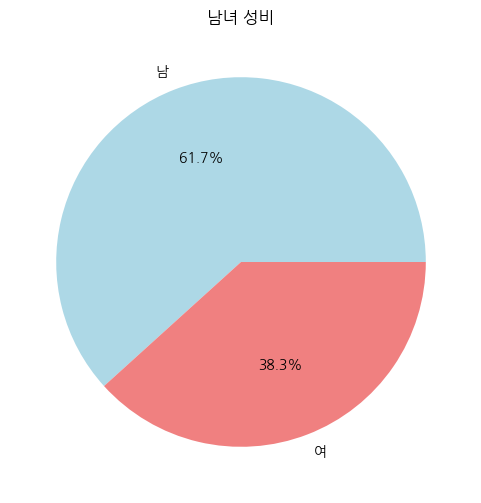

<ipython-input-12-81992c8c91b1>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decade_counts.index, y=decade_counts.values, palette="viridis")


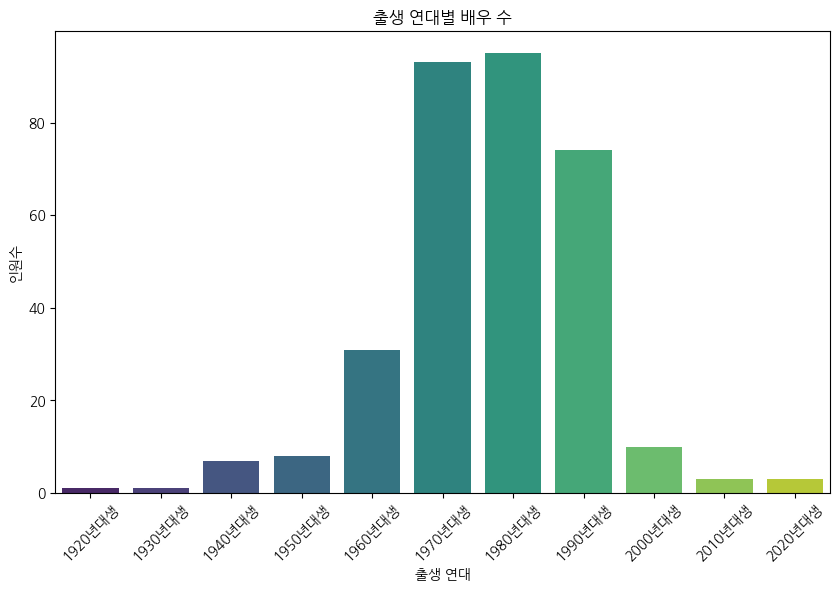

<ipython-input-12-81992c8c91b1>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=school_counts.index, y=school_counts.values, palette="coolwarm")


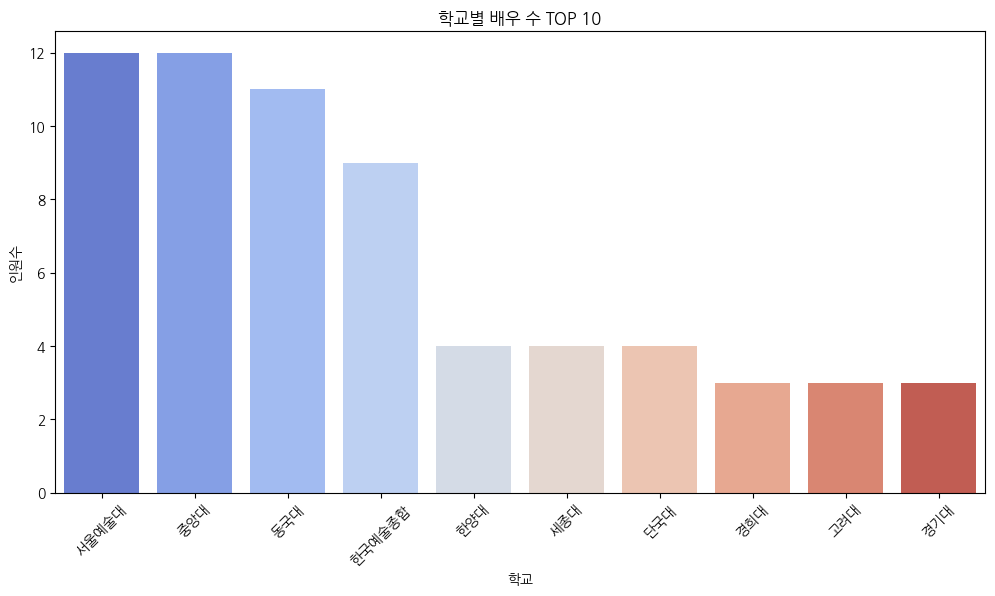

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def analyze_and_visualize(input_file):
    # CSV 파일 읽기
    df = pd.read_csv(input_file)

    # 1. 남녀 성비 파이그래프
    gender_counts = df["성별"].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
    plt.title("남녀 성비")
    plt.show()

    # 2. 생년월일 10년 단위로 그룹화하여 막대그래프 생성
    df["출생연도"] = df["생년월일"].str[:4].astype(str)
    df = df[df["출생연도"].str.isnumeric()]  # 숫자가 아닌 값 제거
    df["출생연도"] = df["출생연도"].astype(int)
    df["출생연대"] = (df["출생연도"] // 10 * 10).astype(str) + "년대생"

    decade_counts = df["출생연대"].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=decade_counts.index, y=decade_counts.values, palette="viridis")
    plt.title("출생 연대별 배우 수")
    plt.xlabel("출생 연대")
    plt.ylabel("인원수")
    plt.xticks(rotation=45)
    plt.show()

    # 3. 학교별 배우 수 TOP 10 막대그래프
    school_counts = df["학교"].value_counts().nlargest(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=school_counts.index, y=school_counts.values, palette="coolwarm")
    plt.title("학교별 배우 수 TOP 10")
    plt.xlabel("학교")
    plt.ylabel("인원수")
    plt.xticks(rotation=45)
    plt.show()

# 사용 예시
input_csv = "cleaned_actors_info_v3.csv"  # 정제된 CSV 파일 경로
analyze_and_visualize(input_csv)

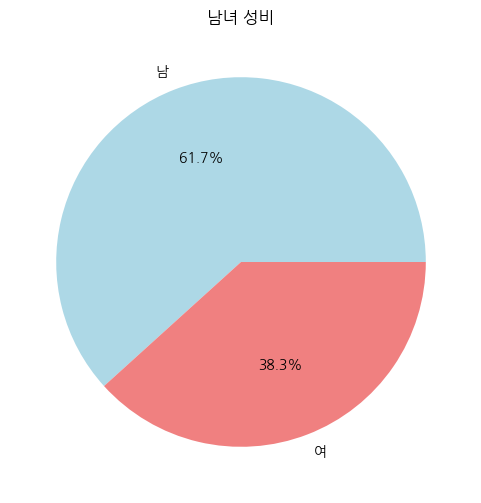

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_visualize(input_file):
    # CSV 파일 읽기
    df = pd.read_csv(input_file)

    # 1. 남녀 성비 파이그래프
    gender_counts = df["성별"].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
    plt.title("남녀 성비")
    plt.show()

    # 2. 출생 연도 데이터 전처리
    df["출생연도"] = df["생년월일"].str[:4]  # 'YYYY-MM-DD' 형식에서 연도 추출
    df = df[df["출생연도"].str.isnumeric()]  # 숫자가 아닌 값 제거
    df["출생연도"] = df["출생연도"].astype(int)

    # 2-1. 출생 연대(10년 단위) 막대그래프
    df["출생연대"] = (df["출생연도"] // 10 * 10).astype(str) + "년대생"
    decade_counts = df["출생연대"].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=decade_counts.index, y=decade_counts.values, palette="viridis")
    plt.title("출생 연대별 배우 수")
    plt.xlabel("출생 연대")
    plt.ylabel("인원수")
    plt.xticks(rotation=45)
    plt.show()

    # 2-2. **출생 연도별 배우 수 막대그래프**
    year_counts = df["출생연도"].value_counts().sort_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(x=year_counts.index, y=year_counts.values, palette="magma")
    plt.title("출생 연도별 배우 수")
    plt.xlabel("출생 연도")
    plt.ylabel("인원수")
    plt.xticks(rotation=45)
    plt.show()

    # 3. 학교별 배우 수 TOP 10 막대그래프
    school_counts = df["학교"].value_counts().nlargest(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=school_counts.index, y=school_counts.values, palette="coolwarm")
    plt.title("학교별 배우 수 TOP 10")
    plt.xlabel("학교")
    plt.ylabel("인원수")
    plt.xticks(rotation=45)
    plt.show()

# 사용 예시
input_csv = "cleaned_actors_info_v3.csv"
analyze_and_visualize(input_csv)


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import csv

# 크롬 옵션 설정
chrome_options = Options()
chrome_options.add_argument('--headless')  # 브라우저를 실제로 띄우지 않고 실행
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# 드라이버 생성
driver = webdriver.Chrome(options=chrome_options)
wait = WebDriverWait(driver, 10)  # 최대 10초까지 대기

# CSV 파일 생성
with open("actors_info.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["배우 이름", "흥행지수"])  # CSV 헤더 작성

    # 페이지 열기
    driver.get("http://www.cine21.com/rank/person")

    # "2년" 링크 클릭
    try:
        two_years_link = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[2]/div[2]/div[2]/div[1]/ul/li[2]/a[4]")))
        two_years_link.click()
        time.sleep(2)  # 페이지 변경을 기다림
    except Exception as e:
        print(f"에러 발생 (2년 링크 클릭 실패): {e}")

    for nextButton in range(1, 6):  # 1~5 페이지 이동
        for page in range(1, 11):  # 각 페이지 내 1~10 이동
            for i in range(1, 8):  # 한 페이지에서 1~7번째 배우 선택
                try:
                    # 페이지 이동 버튼 클릭 (필요한 경우)
                    if nextButton == 2:
                        for j in range(1, nextButton):
                            button = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[2]/div[2]/div[2]/div[2]/div/a[2]/span[2]")))
                            button.click()
                            time.sleep(2)
                    elif nextButton > 2:
                        button = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[2]/div[2]/div[2]/div[2]/div/a[2]/span[2]")))
                        button.click()
                        time.sleep(2)
                        for j in range(1, nextButton-1):
                            button = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[2]/div[2]/div[2]/div[2]/div/a[3]/span[2]")))
                            button.click()
                            time.sleep(2)

                    # 페이지 번호 클릭
                    page_xpath = f"/html/body/div[2]/div[2]/div[2]/div[2]/div/div/a[{page}]"
                    pageButton = wait.until(EC.element_to_be_clickable((By.XPATH, page_xpath)))
                    pageButton.click()
                    time.sleep(3)  # 페이지 로드 대기

                    # 배우 이름 가져오기
                    actor_xpath = f"/html/body/div[2]/div[2]/div[2]/div[2]/ul/li[{i}]/div/a"
                    actor_element = wait.until(EC.presence_of_element_located((By.XPATH, actor_xpath)))
                    actor_name = actor_element.text

                    # 흥행지수 가져오기
                    score_xpath = f"/html/body/div[2]/div[2]/div[2]/div[2]/ul/li[{i}]/ul[1]/li/strong"
                    score_element = wait.until(EC.presence_of_element_located((By.XPATH, score_xpath)))
                    actor_score = score_element.text

                    # CSV에 저장
                    writer.writerow([actor_name, actor_score])
                    print(f"{actor_name} - {actor_score} 저장 완료!")

                except Exception as e:
                    print(f"에러 발생: {e}")

# 드라이버 종료
driver.quit()
print("크롤링 완료! 'actors_info_score.csv' 파일을 확인하세요.")


In [ ]:
import pandas as pd

df1 = pd.read_csv("/content/actor_search_volume_with_age (1).csv")
df2 = pd.read_csv("/content/actors_avg_ratings.csv")

keyword_col = "키워드"
actor_col = "Actor"

merged_df = df1.merge(df2, left_on=keyword_col, right_on=actor_col, how="inner")

merged_df.to_csv("merged_output.csv", index=False)

print("파일 병합 완료! 'merged_output.csv' 파일이 생성되었습니다.")

파일 병합 완료! 'merged_output.csv' 파일이 생성되었습니다.


In [ ]:
df3 = pd.read_csv("/content/merged_output.csv")
df3

rating = df3['Average Rating']
score = df3['흥행지수']
searchAmount = df3['검색량']

data = {'흥행지수' : score, '평점' : rating}
data2 = {'흥행지수' : score, '평점' : rating, '검색량' : searchAmount}
df4 = pd.DataFrame(data2)

coef = df4.corr(method='spearman')
print(coef)

          흥행지수        평점       검색량
흥행지수  1.000000  0.031069  0.259598
평점    0.031069  1.000000  0.250576
검색량   0.259598  0.250576  1.000000


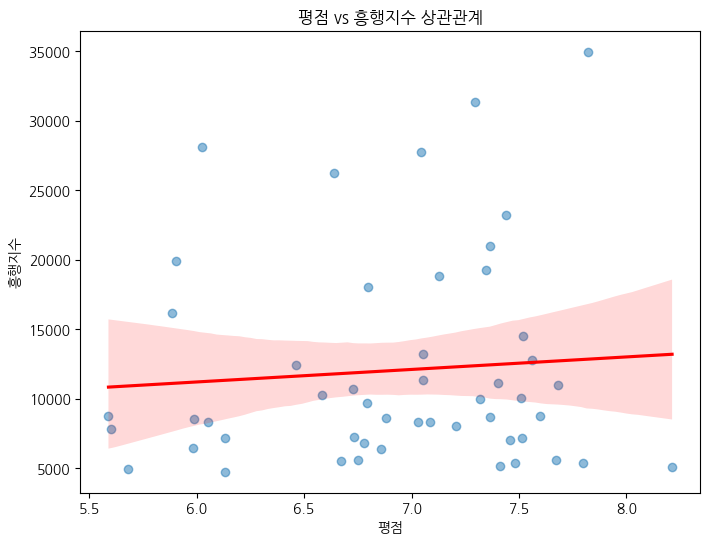

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 및 회귀선 추가
plt.figure(figsize=(8, 6))
sns.regplot(x=df4['평점'], y=df4['흥행지수'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

plt.xlabel("평점")
plt.ylabel("흥행지수")
plt.title("평점 vs 흥행지수 상관관계")

plt.show()

In [ ]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression


fit = ols('흥행지수 ~ 평점',data = df4).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   흥행지수   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.2968
Date:                Wed, 19 Mar 2025   Prob (F-statistic):              0.588
Time:                        07:12:52   Log-Likelihood:                -516.68
No. Observations:                  50   AIC:                             1037.
Df Residuals:                      48   BIC:                             1041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5788.6087   1.15e+04      0.504      0.6

In [ ]:
df5 = pd.DataFrame(data2)
df5

,흥행지수,평점,검색량
0,34949,7.823333,63080
1,27733,7.043333,208700
2,26224,6.640000,259000
3,31326,7.295000,109300
4,28122,6.025000,22760
5,23209,7.437500,430900
6,19917,5.903333,64080
7,20962,7.363333,55710
8,18811,7.128333,149400
9,19223,7.345000,30650


In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# 공백을 언더스코어로 변경
df5.columns = df5.columns.str.replace(' ', '_')

# 데이터를 훈련 세트와 테스트 세트로 분할
train, test = train_test_split(df5, test_size=0.3, random_state=0)

# X, Y 데이터 나누기
train_X = train[train.columns[1:]]  # 첫 번째 열을 제외한 모든 열
train_Y = train[train.columns[:1]]  # 첫 번째 열만
test_X = test[test.columns[1:]]    # 첫 번째 열을 제외한 모든 열
test_Y = test[test.columns[:1]]    # 첫 번째 열만

# 입력 차원 수정: train_X의 열 개수에 맞게 수정
input_dim = train_X.shape[1]

# 모델 정의
model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))  # input_dim을 데이터의 열 수에 맞춤
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(35, activation='softmax'))  # 출력 클래스가 35개라고 가정
model.summary()

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# LabelEncoder로 라벨 인코딩
encoder = LabelEncoder()
encoder.fit(train_Y.values.ravel())  # 2D를 1D로 변환
onehot_train_Y = encoder.transform(train_Y)
train_f_Y = to_categorical(onehot_train_Y)

# 테스트 라벨 변환
encoder.fit(test_Y.values.ravel())  # 2D를 1D로 변환
onehot_test_Y = encoder.transform(test_Y)
test_f_Y = to_categorical(onehot_test_Y)

# 결과 확인
print(test_f_Y)
print(test_f_Y.shape)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 35)                  │             315 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,251 (12.70 KB)

 Trainable params: 3,251 (12.70 KB)

 Non-trainable params: 0 (0.00 B)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
(15, 15)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
model.fit(train_X, train_f_Y, epochs=100, batch_size=1)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0147 - loss: 6538.7056
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1427.8267
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 70.0270
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3.5539
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3.5549
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 3.5581
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3.5557
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3.5536
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0882 - loss: 3.5542
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3.5552
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 3.5560
Epoch 12/100
35/35 ━

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# 데이터 준비
data = {
    '흥행지수': [34949, 27733, 26224, 31326, 28122, 23209, 19917, 20962, 18811, 19223,
                18043, 12740, 14481, 16163, 13184, 12434, 11009, 11094, 11331, 10699,
                10275, 9698, 10074, 9966, 8754, 8732, 8562, 8323, 8680, 8589, 8319,
                8307, 8049, 7223, 7784, 7178, 6434, 6802, 7140, 6984, 6361, 5373, 5565,
                5504, 5545, 5360, 5115, 4737, 4915, 5102],
    '평점': [7.823333, 7.043333, 6.640000, 7.295000, 6.025000, 7.437500, 5.903333, 7.363333,
             7.128333, 7.345000, 6.798333, 7.560000, 7.517500, 5.883333, 7.053333, 6.463333,
             7.680000, 7.402500, 7.054000, 6.726667, 6.581667, 6.793333, 7.508333, 7.320000,
             5.590000, 7.600000, 5.986667, 7.031667, 7.367500, 6.882000, 7.084000, 6.051667,
             7.207500, 6.732500, 5.600000, 6.130000, 5.983333, 6.778333, 7.512500, 7.460000,
             6.857500, 7.481667, 6.750000, 6.670000, 7.670000, 7.800000, 7.410000, 6.130000,
             5.682500, 8.212500],
    '검색량': [63080, 208700, 259000, 109300, 22760, 430900, 64080, 55710, 149400, 30650,
               37280, 156300, 431200, 46410, 89200, 14460, 73680, 35770, 20380, 170400,
               137000, 113800, 28980, 67480, 25630, 114100, 18870, 25560, 66050, 26780,
               258600, 16980, 88010, 39320, 43780, 149250, 11390, 127030, 64040, 37280,
               26910, 39780, 30060, 99100, 587500, 45430, 10030, 119700, 17670, 25910]
}
from sklearn.utils import shuffle
df = pd.DataFrame(data)
df_shuffled = shuffle(df, random_state=42)
# 특성 (평점, 검색량)과 타겟 변수 (흥행지수) 나누기
X = df[['평점', '검색량']]
y = df['흥행지수']

# 데이터 스케일링 (StandardScaler 사용)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 세트와 테스트 세트로 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# DNN 모델 정의
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # 입력 차원은 X_train의 열 수 (2)
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))  # 회귀 문제이므로 출력층은 1개, 활성화 함수 없음 (선형)

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# 모델 학습
model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test))

# 모델 평가
loss, mae = model.evaluate(X_test, y_test)
print(f"테스트 세트에서의 MAE: {mae}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 197881680.0000 - mae: 12166.7363 - val_loss: 88396328.0000 - val_mae: 8887.4951
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 258224960.0000 - mae: 13693.6680 - val_loss: 88388472.0000 - val_mae: 8887.0479
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 138324176.0000 - mae: 10087.9424 - val_loss: 88354432.0000 - val_mae: 8885.0820
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 241682928.0000 - mae: 13193.8457 - val_loss: 88216656.0000 - val_mae: 8877.1787
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 333453600.0000 - mae: 15358.2705 - val_loss: 87724552.0000 - val_mae: 8848.8633
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 199155152.0000 - mae: 11744.0840 - val_loss: 86333680.0000 - val_mae: 8768.4961
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 205341600.0000 - mae: 12554.3779 - val_loss: 83068504.0000 - val_mae: 8576.0801
Epoch 8/100
40/40 ━━━━━━━━

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# 데이터 불러오기
df3 = pd.read_csv("final_actor_addnewsTitle.csv")

# 특성 (평점, 검색량)과 타겟 변수 (흥행지수) 나누기
rating = df3['Average Rating']
score = df3['흥행지수']
searchAmount = df3['검색량']
newsTitle = df3['newsTitle']

data = {'흥행지수': score, '평점': rating}
data2 = {'흥행지수': score, '평점': rating, '검색량': searchAmount, '기사제목수' : newsTitle}
df4 = pd.DataFrame(data2)

# 특성(X)와 타겟(y) 변수 나누기
X = df4[['평점', '검색량', '기사제목수']]
y = df4['흥행지수']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 세트와 테스트 세트로 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [12]:
coef = df4.corr(method='kendall')
print(coef)
coef = df4.corr(method='pearson')
print(coef)
coef = df4.corr(method='spearman')
print(coef)

           흥행지수        평점       검색량     기사제목수
흥행지수   1.000000  0.024500  0.181299  0.255510
평점     0.024500  1.000000  0.147876  0.132299
검색량    0.181299  0.147876  1.000000  0.566762
기사제목수  0.255510  0.132299  0.566762  1.000000
           흥행지수        평점       검색량     기사제목수
흥행지수   1.000000  0.078394  0.170223  0.373067
평점     0.078394  1.000000  0.250880  0.107237
검색량    0.170223  0.250880  1.000000  0.477471
기사제목수  0.373067  0.107237  0.477471  1.000000
           흥행지수        평점       검색량     기사제목수
흥행지수   1.000000  0.031069  0.259598  0.370660
평점     0.031069  1.000000  0.250576  0.240006
검색량    0.259598  0.250576  1.000000  0.744316
기사제목수  0.370660  0.240006  0.744316  1.000000


In [2]:
# DNN 모델 정의
model = Sequential()

# 첫 번째 은닉층
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# 두 번째 은닉층
model.add(Dense(32, activation='relu'))

# 세 번째 은닉층
model.add(Dense(16, activation='relu'))

# 네 번째 은닉층
model.add(Dense(8, activation='relu'))

# 출력층
model.add(Dense(1))  # 회귀 문제이므로 출력층은 1개, 활성화 함수 없음 (선형)

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# 모델 학습
model.fit(X_train, y_train, epochs=2000, batch_size=2, validation_data=(X_test, y_test))

# 모델 평가
loss, mae = model.evaluate(X_test, y_test)
print(f"테스트 세트에서의 MAE: {mae}")


Epoch 1/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 45817684.0000 - mae: 5474.3511 - val_loss: 54716416.0000 - val_mae: 6351.1963
Epoch 2/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 40964752.0000 - mae: 5124.0449 - val_loss: 51343660.0000 - val_mae: 6170.0625
Epoch 3/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 34066896.0000 - mae: 4867.8145 - val_loss: 51633280.0000 - val_mae: 6185.6406
Epoch 4/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 58285016.0000 - mae: 6036.9180 - val_loss: 52318968.0000 - val_mae: 6223.0200
Epoch 5/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29749408.0000 - mae: 4319.7085 - val_loss: 47759816.0000 - val_mae: 5979.6270
Epoch 6/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37267884.0000 - mae: 5112.8462 - val_loss: 53976888.0000 - val_mae: 6305.9673
Epoch 7/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 52625884.0000 - mae: 5797.7661 - val_loss: 53065480.0000 - val_mae: 6268.8169
Epoch 8/2000
20/20 ━━━━━━━━━━━━

In [21]:
import numpy as np

# 예측값과 실제값
y_pred = model.predict(X_test).flatten()  # 예측값을 1D 배열로 변환
y_actual = y_test.values  # Pandas Series를 NumPy 배열로 변환

# MAPE 계산
mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100
accuracy = 100 - mape

print(f"MAPE: {mape:.2f}%")
print(f"예측 정확도: {accuracy:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
MAPE: 62.56%
예측 정확도: 37.44%


In [24]:
from sklearn.metrics import r2_score

r2 = r2_score(y_actual, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: -3.2319


In [25]:
# 예측값
y_pred = model.predict(X_test).flatten()  # 2D 배열을 1D로 변환

# 예측값과 실제값 차이 출력
print("예측값 | 실제값 | 차이")
for pred, actual in zip(y_pred, y_test):
    print(f"{pred:.4f} | {actual:.4f} | {abs(pred - actual):.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
예측값 | 실제값 | 차이
22695.4258 | 16163.0000 | 6532.4258
5028.5142 | 6984.0000 | 1955.4858
14103.2705 | 8319.0000 | 5784.2705
6721.1880 | 5360.0000 | 1361.1880
7678.7295 | 11094.0000 | 3415.2705
18453.8848 | 4915.0000 | 13538.8848
8686.5508 | 8562.0000 | 124.5508
19349.2559 | 8732.0000 | 10617.2559
7582.8076 | 8049.0000 | 466.1924
13603.1533 | 10699.0000 | 2904.1533
